In [8]:
#import data from discovered_recipes_20250423_172822.csv as combinations
import pandas as pd
import numpy as np


# Load the CSV file into a DataFrame
df = pd.read_csv('discovered_recipes_20250423_172822.csv')
combinations = df.to_numpy().tolist()
combinations
# caculate unique elemetnes in the combinations
unique_elements = set()
for combination in combinations:
    for element in combination:
        #check if element is in the set
        if element not in unique_elements:
            # add the element to the set
            unique_elements.add(element)
# convert the set to a list
unique_elements = list(unique_elements)

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

c:\Users\bono\anaconda3\envs\Infinitycraft\Lib\site-packages\networkx\drawing\nx_pylab.py:1439: UserWarning:

Gl

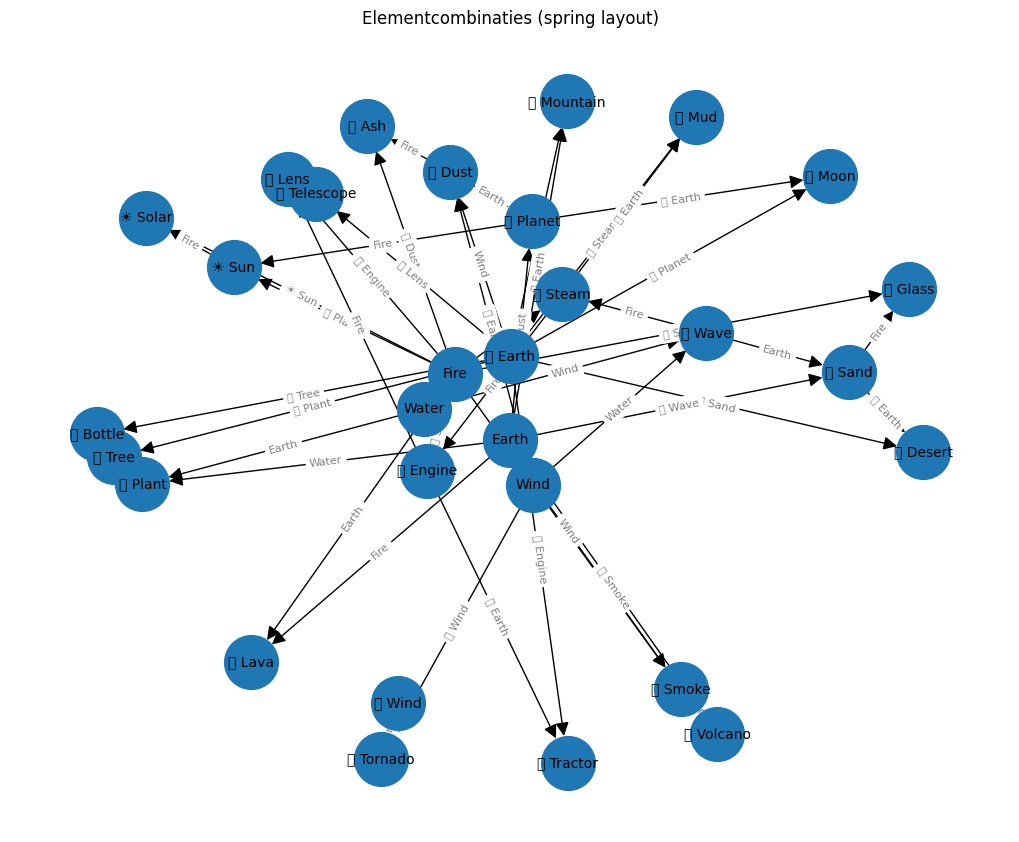

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# graaf opbouwen
G = nx.DiGraph()
for a, b, c in combinations:
    G.add_edge(a, c, label=b)
    G.add_edge(b, c, label=a)

# positie berekenen
pos = nx.spring_layout(G, seed=42)

# tekenen
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=8)
plt.title("Elementcombinaties (spring layout)")
plt.axis('off')
plt.show()


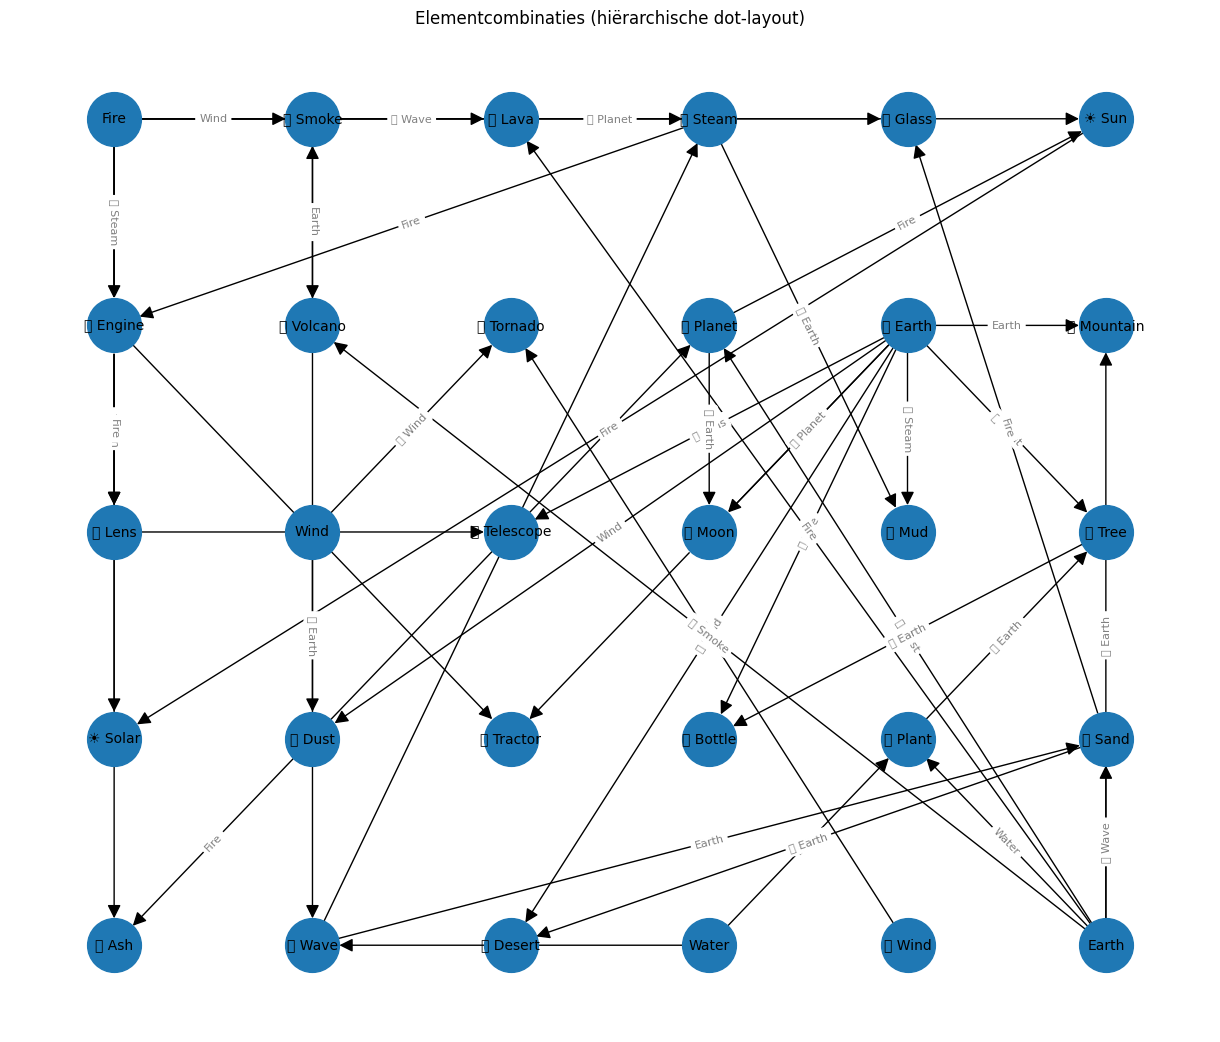

In [39]:
# zorg dat je pygraphviz of pydot-installeert met: pip install pygraphviz
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

G = nx.DiGraph()
for a, b, c in combinations:
    G.add_edge(a, c, label=b)
    G.add_edge(b, c, label=a)

# Graphviz dot lay-out
pos = graphviz_layout(G, prog='patchwork' )  # prog='dot' voor hiërarchie

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=8)
plt.title("Elementcombinaties (hiërarchische dot-layout)")
plt.axis('off')
plt.show()


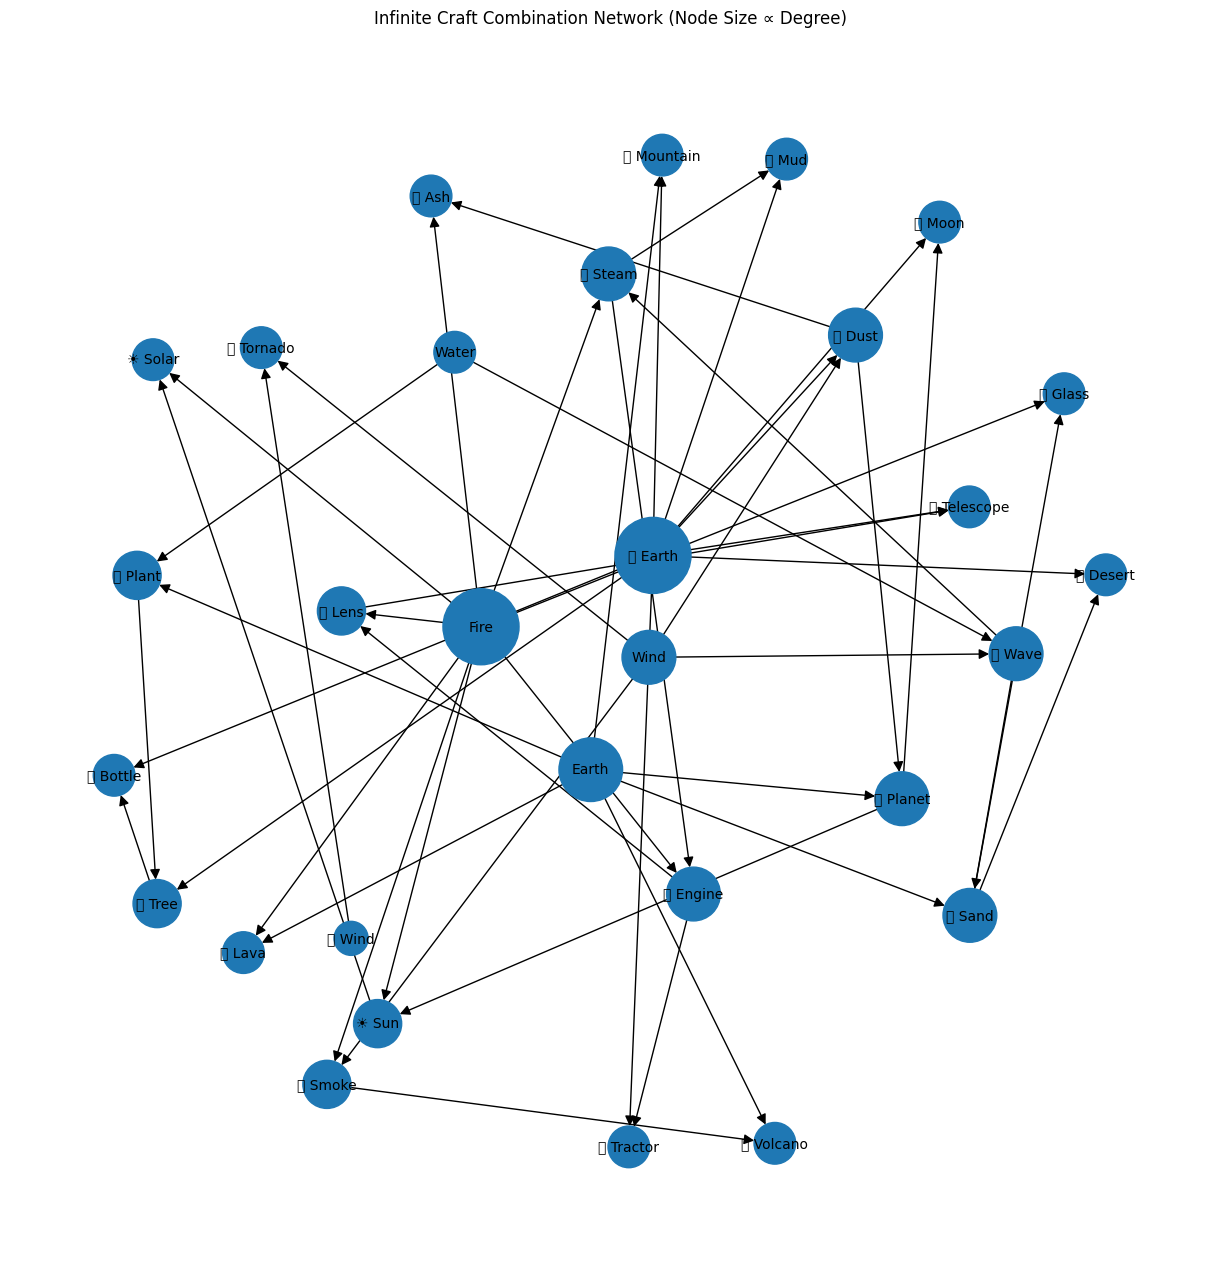

In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = df

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    e1, e2, result = row['Element1'], row['Element2'], row['Result']
    G.add_node(e1)
    G.add_node(e2)
    G.add_node(result)
    G.add_edge(e1, result)
    G.add_edge(e2, result)

# Compute node sizes based on degree (number of connections)
degrees = dict(G.degree())
# Scale sizes: base size plus multiplier
node_sizes = [300 + degrees[n] * 300 for n in G.nodes()]

# Layout and draw
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=1.2, seed=42)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=10, arrowsize=15)
plt.title("Infinite Craft Combination Network (Node Size ∝ Degree)", pad=20)
plt.axis('off')
plt.show()
